Урок 3
Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных
Домашнее задание


In [2]:
import numpy as np
import pandas as pd

<b><u>Задача 1</u></b>

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.



In [27]:
df = pd.DataFrame((100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150))
s = df[0]



 <b> среднее арифметическое<b>

In [18]:
s.sum() / s.count()

73.14285714285714

In [13]:
#проверка
s.mean()

73.14285714285714

 <b> смещённая и несмещённая оценка дисперсии</b>

In [20]:
( (s - s.mean())**2 ).sum()/ s.count()

2135.0748299319725

In [22]:
#проверка
s.var(ddof=0)

2135.074829931973

In [23]:
( (s - s.mean())**2 ).sum()/( s.count()-1)

2241.828571428571

In [24]:
#проверка
s.var(ddof=1)

2241.8285714285716

 <b>среднее квадратичное отклонение<b>

$$\sigma =  \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}, \:\:
\sigma_{unbiased} = \sqrt{\dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}$$

In [6]:
np.sqrt(( (s - s.mean())**2 ).sum()/ s.count())

46.206869943028735

In [14]:
#проверка
s.std(ddof=0)

46.20686994302874

In [17]:
np.sqrt(( (s - s.mean())**2 ).sum()/  (s.count()-1))

47.347952135531386

In [15]:
#проверка
s.std(ddof=1)

47.34795213553139

<b><u>Задача 2</u></b>

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.



In [33]:
s_sorted = sorted(s)
length =len(s_sorted)
#медиана
s_sorted[length // 2 - 5 : length // 2 + 5]


[45, 55, 57, 65, 65, 70, 75, 75, 77, 80]

In [ ]:
mediana=70

In [34]:
s.median()

70.0

In [39]:
#1й квартиль
length // 4 

5

In [40]:
s_sorted[(length // 2 + 1) // 2 - 4 : (length // 2 + 1) // 2 + 5]

[24, 25, 30, 33, 45, 55, 57, 65, 65]

In [67]:
q1=45

In [42]:
#3й квартиль
s_sorted [(length * 3 // 2 + 1) // 2 - 4 : (length * 3 // 2 + 1) // 2 + 5]

[75, 77, 80, 84, 89, 90, 100, 150, 230]

In [58]:
q3=84

In [59]:
(s <= q3).sum() / length

0.7619047619047619

In [60]:
(s >= q3).sum() / length

0.2857142857142857

In [61]:
s.quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
Name: 0, dtype: float64

In [70]:
#нтерквартильное расстояние
iqr = q3 - q1
iqr

39

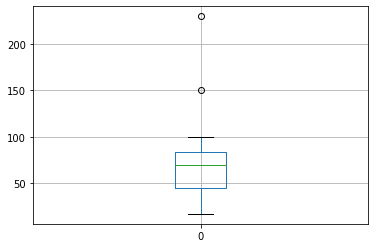

In [65]:
df[[0]].boxplot()

In [71]:
#выборсы
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [74]:
outliers = df.loc[(df[0] < boxplot_range[0]) | (df[0] > boxplot_range[1])]
outliers

,0
11,230
20,150


<b><u>Задача 3</u></b>

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

1/4  - вероятность того, что студент с факультета A <br>
1/4  - вероятность того, что студент с факультета B <br>
1/2  - вероятность того, что студент с факультета C<br>
<p></p>
X - событие: студент сдал <br>
H_A, H_B, H_C  - событие: студент с факультета A, B, C<br>
    

In [76]:
P_Ha = 0.25 #вероятность того, что студент с факультета A
P_Hb = 0.25 #вероятность того, что студент с факультета B
P_Hc = 0.5 #вероятность того, что студент с факультета C

P_Xa = 0.8 # Вероятность того, что студент факультета A сдаст  сессию
P_Xb = 0.7 # Вероятность того, что студент факультета B сдаст  сессию
P_Xc = 0.9 # Вероятность того, что студент факультета C сдаст  сессию


#посчитаем рероятность того, чт студент сдаст сессию ( по формуле полной вероятности)
P_X = P_Ha*P_Xa  + P_Hb*P_Xb + P_Hc*P_Xc
P_X

0.825


посчитаем рероятности того, что студент , который сдал (событие X), с факультета A,B,C  по формуле Байеса:

$$P(X|H_A) = \frac{P(H_a) \cdot P(H_a|X)}{P(X)}.$$


In [77]:
P_X_Ha = P_Ha* P_Xa /P_X
P_X_Ha

0.24242424242424246

In [78]:
P_X_Hb = P_Hb* P_Xb /P_X
P_X_Hb

0.21212121212121213

In [79]:
P_X_Hc = P_Hc* P_Xc /P_X
P_X_Hc

0.5454545454545455